In [1]:
import torch
from torch import nn
from torchvision import transforms
from tools.data_reader import load_FashionMnist
from models.LeNet import get_LeNet
from tools.model_trainer import train_model
from tools.model_tester import test_model


In [2]:
batch_size = 256
transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize((0.1307,), (0.3081,))
])
train_iter, valid_iter, test_iter = load_FashionMnist(batch_size=batch_size, valid_split=0.2, transform=transform)
print(f"train size: {len(train_iter.dataset)}")
print(f"valid size: {len(valid_iter.dataset)}")
print(f"test size: {len(test_iter.dataset)}")

for X, y in test_iter:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break


train size: 48000
valid size: 12000
test size: 10000
Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


D:\Anaconda3\envs\lxh_torch\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
net = get_LeNet()
print(net)


Using cuda device
Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): Sigmoid()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): Sigmoid()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=400, out_features=120, bias=True)
  (8): Sigmoid()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): Sigmoid()
  (11): Linear(in_features=84, out_features=10, bias=True)
)


Train result
loss 2.306
final train Accuracy 0.101
final valid Accuracy 0.098
3249.463 examples/sec on cuda
14.772 sec/epoch on cuda


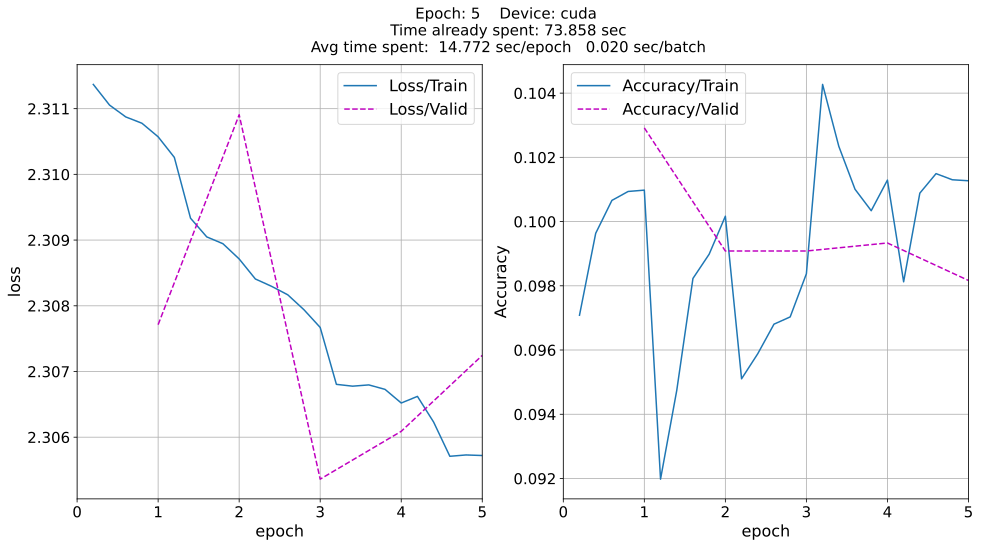

In [4]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.9)
train_model(net, train_iter, valid_iter, loss_fn, ['accuracy'], optimizer, num_epochs=10, device=device, use_tensorboard=False, use_animator=True) 


In [5]:
test_model(net, test_iter, loss_fn, ['accuracy'], device=device)

        Test result
            Number of instances: 10000
            Number of batches: 156
            Avg loss of each batch: 2.306622
            
Accuracy: 0.100
Time spent: 0.8112382888793945 sec
                12326.834 examples/sec
                0.005 sec/batch on cuda
                


(2.306622486848098, [0.1])